In [12]:
import os
import json
import pandas as pd
import sys
import matplotlib.pyplot as plt


In [13]:
file = "../stream-k/gemm_tiles_trace_rank0.json"
file = "../stream-k/gemm_tiles_all_scatter_trace_rank0.json"
with open(file, "r") as f:
    timestamps = json.load(f)

In [14]:
timestamps

[{'tild_id': 0,
  'gemm_begin': 0,
  'gemm_end': 3485,
  'poll_begin': 118,
  'poll_end': 3484,
  'op_begin': 3484,
  'op_end': 5195,
  'comm_begin': 118,
  'comm_end': 5195},
 {'tild_id': 1,
  'gemm_begin': 0,
  'gemm_end': 3513,
  'poll_begin': 118,
  'poll_end': 3512,
  'op_begin': 3512,
  'op_end': 4581,
  'comm_begin': 118,
  'comm_end': 4581},
 {'tild_id': 2,
  'gemm_begin': 0,
  'gemm_end': 3505,
  'poll_begin': 118,
  'poll_end': 3505,
  'op_begin': 3505,
  'op_end': 4847,
  'comm_begin': 118,
  'comm_end': 4847},
 {'tild_id': 3,
  'gemm_begin': 0,
  'gemm_end': 3498,
  'poll_begin': 118,
  'poll_end': 3499,
  'op_begin': 3499,
  'op_end': 4843,
  'comm_begin': 118,
  'comm_end': 4843},
 {'tild_id': 4,
  'gemm_begin': 0,
  'gemm_end': 3520,
  'poll_begin': 118,
  'poll_end': 3519,
  'op_begin': 3519,
  'op_end': 4870,
  'comm_begin': 118,
  'comm_end': 4870},
 {'tild_id': 5,
  'gemm_begin': 0,
  'gemm_end': 3533,
  'poll_begin': 118,
  'poll_end': 3533,
  'op_begin': 3533,
  'o

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_timeline(data, operations, max_elements = 32, spacing=10, height=4.5, figsize=(10, 8), offset=1.5):
    colors = ["blue", "green", "red", "purple", "orange", "cyan"]
    ids = [entry["tild_id"] * spacing for entry in data]  
    color_map = {op: colors[i % len(colors)] for i, op in enumerate(operations)}
    plt.figure(figsize=figsize)
    for i, op in enumerate(operations):
        start_times = [entry[f"{op}_begin"] for entry in data]
        durations = [entry[f"{op}_end"] - entry[f"{op}_begin"] for entry in data]
        y_positions = [y + (i - len(operations) / 2) * offset for y in ids]
        y_positions = np.array(y_positions)  
        durations = np.array(durations)  
        
        start_times = start_times[0:max_elements]
        durations = durations[0:max_elements]
        y_positions = y_positions[0:max_elements]
        print(op)
        # print(y_positions.min())
        # print(y_positions.max()) 
        print(durations.min())
        print(durations.max()) 
        plt.barh(y_positions, durations, left=start_times, height=height, 
                 color=color_map[op], edgecolor="black", alpha=0.7, label=op.upper())
        y_min = y_positions.min() - offset 
        y_max = y_positions.max() + offset
        # plt.ylim(y_min, y_max)

    plt.xlabel("Timestamp")
    plt.ylabel("Tiles")
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()




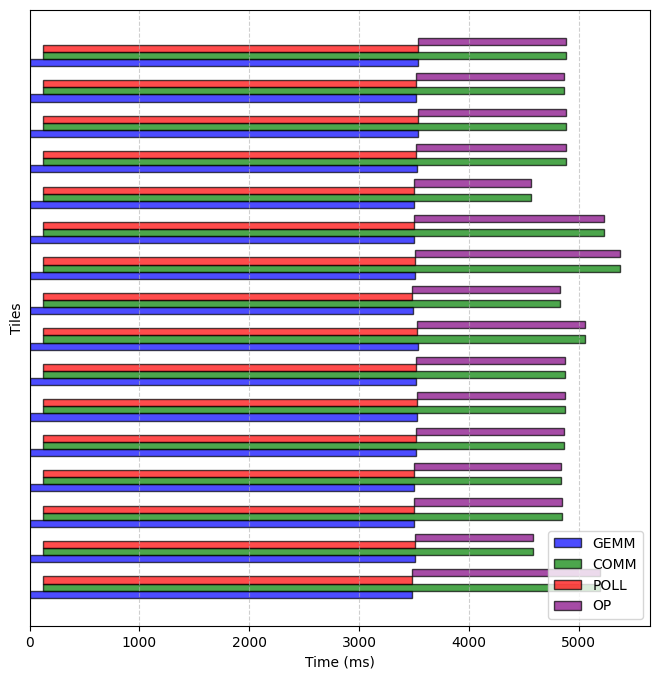

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_timeline(data, operations, max_elements=None, spacing=10, figsize=(10, 8)):
    colors = ["blue", "green", "red", "purple", "orange", "cyan"]
    ids = [entry["tild_id"] * spacing for entry in data]  

    color_map = {op: colors[i % len(colors)] for i, op in enumerate(operations)}
    num_operations = len(operations)
    bar_height = spacing / (num_operations + 1)  # Dynamically adjust height to prevent overlap

    plt.figure(figsize=figsize)

    for i, op in enumerate(operations):
        start_times = np.array([entry[f"{op}_begin"] for entry in data])
        durations = np.array([entry[f"{op}_end"] - entry[f"{op}_begin"] for entry in data])
        y_positions = np.array([y + (i - num_operations / 2) * bar_height for y in ids])  # Adjusted y positions
        
        if max_elements != None:
            start_times = start_times[:max_elements]
            durations = durations[:max_elements]
            y_positions = y_positions[:max_elements]

        plt.barh(y_positions, durations, left=start_times, height=bar_height, 
                 color=color_map[op], edgecolor="black", alpha=0.7, label=op.upper())

    plt.xlabel("Time (ms)")
    plt.ylabel("Tiles")
    plt.yticks([])  # Removes the tick marks but keeps axis labels

    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# plot_timeline(timestamps, ["gemm", "comm", "poll", "op"], spacing=15, offset=8, figsize=(8, 64),  max_elements = 8)
# plot_timeline(timestamps, ["gemm", "comm", "poll", "op"], spacing=1, figsize=(8, 64),  max_elements = 128)
plot_timeline(timestamps, ["gemm", "comm", "poll", "op"], spacing=1, figsize=(8, 8),  max_elements = 16)
